In [1]:
__author__ = 'Yicheng Li'

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import statsmodels.api as sm
import random
import datetime

dir_path = 'Data/Poloniex/'

/home/yicheng/.local/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df = pd.read_pickle(dir_path+'df_5min.pkl')

In [3]:
df.head()

,USDT_BTC_close,USDT_BTC_high,USDT_BTC_low,USDT_BTC_open,USDT_BTC_quoteVolume,USDT_BTC_volume,USDT_BTC_weightedAverage,USDT_BTC_pctChange,BTC_ETH_close,BTC_ETH_high,...,BTC_LTC_weightedAverage,BTC_LTC_pctChange,BTC_XRP_close,BTC_XRP_high,BTC_XRP_low,BTC_XRP_open,BTC_XRP_quoteVolume,BTC_XRP_volume,BTC_XRP_weightedAverage,BTC_XRP_pctChange
time,,,,,,,,,,,,,,,,,,,,,
2016-01-01 08:00:00,433.010137,433.010137,433.010137,433.010137,0.0,0.0,433.010137,0.0,0.002174,0.002177,...,0.008078,0.000000,0.000014,0.000014,0.000014,0.000014,0.000000,0.000000,0.000014,0.000000
2016-01-01 08:05:00,433.010137,433.010137,433.010137,433.010137,0.0,0.0,433.010137,0.0,0.002177,0.002177,...,0.008079,0.000089,0.000014,0.000014,0.000014,0.000014,980.096150,0.013429,0.000014,0.005136
2016-01-01 08:10:00,433.010137,433.010137,433.010137,433.010137,0.0,0.0,433.010137,0.0,0.002175,0.002175,...,0.008079,0.000000,0.000014,0.000014,0.000014,0.000014,657.512017,0.009028,0.000014,0.002190
2016-01-01 08:15:00,433.010137,433.010137,433.010137,433.010137,0.0,0.0,433.010137,0.0,0.002174,0.002175,...,0.008079,0.000000,0.000014,0.000014,0.000014,0.000014,862.028200,0.011801,0.000014,-0.002913
2016-01-01 08:20:00,433.010137,433.010137,433.010137,433.010137,0.0,0.0,433.010137,0.0,0.002174,0.002174,...,0.008079,0.000000,0.000014,0.000014,0.000014,0.000014,5331.418950,0.072934,0.000014,-0.000730


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efc9ddac550>]],
      dtype=object)

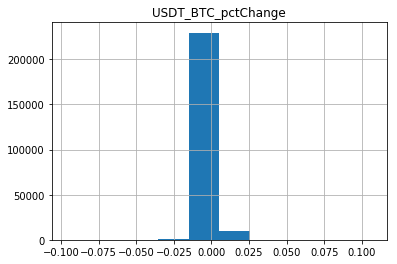

In [4]:
df.hist(column='USDT_BTC_pctChange')

In [12]:
min_pct = df['USDT_BTC_pctChange'].min()
max_pct = df['USDT_BTC_pctChange'].max()
print(min_pct, max_pct)

-0.09588161044700527 0.10635845023694057


(array([4.00000e+00, 3.00000e+00, 2.90000e+01, 7.57000e+02, 2.29503e+05,
        9.69500e+03, 1.25000e+02, 1.00000e+01, 3.00000e+00, 5.00000e+00]),
 array([-0.09588161, -0.0756576 , -0.0554336 , -0.03520959, -0.01498559,
         0.00523842,  0.02546243,  0.04568643,  0.06591044,  0.08613444,
         0.10635845]),
 <a list of 10 Patch objects>)

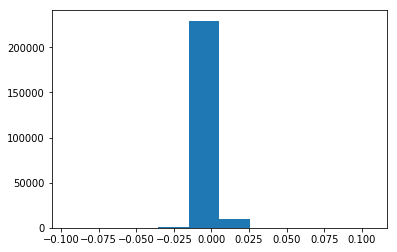

In [11]:
plt.hist(df['USDT_BTC_pctChange'])

In [19]:
(abs(df['USDT_BTC_pctChange']) < 0.01).sum() / len(df)

0.9800153247769995

In [20]:
df2 = pd.DataFrame([1,2,3])

In [22]:
df2.pct_change()

,0
0,NaN
1,1.0
2,0.5


In [30]:
df = pd.read_pickle(dir_path+'df_hourly_with_pair.pickle')

In [31]:
df.head()

,BTC_ETH_high,BTC_ETH_low,BTC_ETH_volume,BTC_ETH_mean,BTC_ETH_quoteVolume,btc_eth_weighted_mean,BTC_LTC_high,BTC_LTC_low,BTC_LTC_volume,BTC_LTC_mean,...,ETH_volume,ETH_mean,ETH_weighted_mean,ETH_percent_change,LTC_high,LTC_low,LTC_volume,LTC_mean,LTC_weighted_mean,LTC_percent_change
time,,,,,,,,,,,,,,,,,,,,,
2016-01-01 08:00:00,0.002178,0.002174,2.544539,0.002175,1170.394668,0.002174,0.008079,0.008052,0.011620,0.008071,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-01 09:00:00,0.002179,0.002163,6.528289,0.002169,3011.175035,0.002167,0.008072,0.008052,0.036629,0.008066,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-01 10:00:00,0.002174,0.002160,1.639960,0.002162,758.664280,0.002161,0.008104,0.008056,0.101427,0.008072,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-01 11:00:00,0.002165,0.002134,7.048119,0.002148,3283.321229,0.002144,0.008114,0.008062,0.131034,0.008091,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-01 12:00:00,0.002151,0.002132,2.006907,0.002136,936.135190,0.002139,0.008114,0.008047,0.576634,0.008089,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
[x for x in zip([x for x in range(30)], df.columns.values)]

[(0, 'BTC_ETH_high'),
 (1, 'BTC_ETH_low'),
 (2, 'BTC_ETH_volume'),
 (3, 'BTC_ETH_mean'),
 (4, 'BTC_ETH_quoteVolume'),
 (5, 'btc_eth_weighted_mean'),
 (6, 'BTC_LTC_high'),
 (7, 'BTC_LTC_low'),
 (8, 'BTC_LTC_volume'),
 (9, 'BTC_LTC_mean'),
 (10, 'BTC_LTC_quoteVolume'),
 (11, 'BTC_LTC_weighted_mean'),
 (12, 'BTC_high'),
 (13, 'BTC_low'),
 (14, 'BTC_volume'),
 (15, 'BTC_mean'),
 (16, 'BTC_weighted_mean'),
 (17, 'BTC_percent_change'),
 (18, 'ETH_high'),
 (19, 'ETH_low'),
 (20, 'ETH_volume'),
 (21, 'ETH_mean'),
 (22, 'ETH_weighted_mean'),
 (23, 'ETH_percent_change'),
 (24, 'LTC_high'),
 (25, 'LTC_low'),
 (26, 'LTC_volume'),
 (27, 'LTC_mean'),
 (28, 'LTC_weighted_mean'),
 (29, 'LTC_percent_change')]

In [50]:
filled = df['BTC_percent_change'].replace(np.inf, np.nan).fillna(method='ffill')

(array([   21.,    24.,    75.,   204.,  1217., 16563.,  1169.,   212.,
           94.,    43.,    22.]),
 array([-0.5       , -0.40909091, -0.31818182, -0.22727273, -0.13636364,
        -0.04545455,  0.04545455,  0.13636364,  0.22727273,  0.31818182,
         0.40909091,  0.5       ]),
 <a list of 11 Patch objects>)

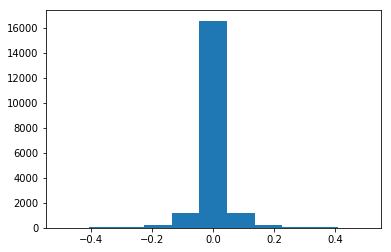

In [49]:
plt.hist(filled, range=(-0.5,0.5), bins=11)

In [51]:
(abs(filled) < 0.01).sum() / len(df)

0.543823705776534

In [56]:
from scipy import stats
bin_edges = stats.mstats.mquantiles(filled, [x/3 for x in range(4)])

In [57]:
bin_edges

array([-1.00000000e+00, -3.09330785e-03,  3.28352206e-03,  1.10486870e+01])

In [58]:
(abs(filled) < 3e-3).sum() / len(df)

0.32130721567059767